In [2]:
from retsupp.utils.data import Subject
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
subject = 1
sub = Subject(subject)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_8205/3633970181.py:4: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  sparse_mask = image.math_img('np.where(mask.astype(bool) & (np.random.rand(*mask.shape) < 0.01), 1, 0)', mask=sub.get_bold_mask())


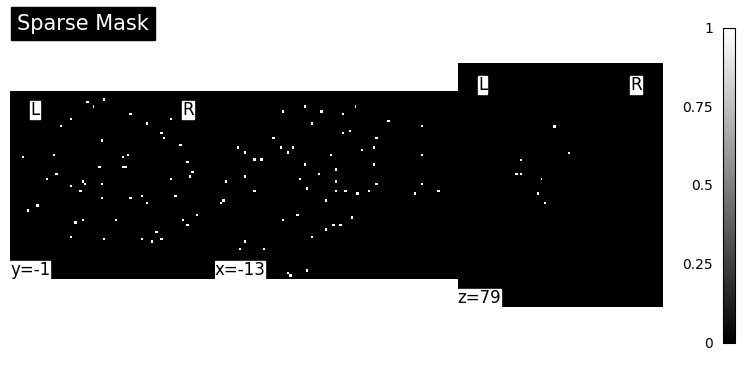

In [11]:
from nilearn import image, plotting


sparse_mask = image.math_img('np.where(mask.astype(bool) & (np.random.rand(*mask.shape) < 0.01), 1, 0)', mask=sub.get_bold_mask())


plotting.plot_img(sparse_mask, title='Sparse Mask')

<Axes: xlabel='x', ylabel='y'>

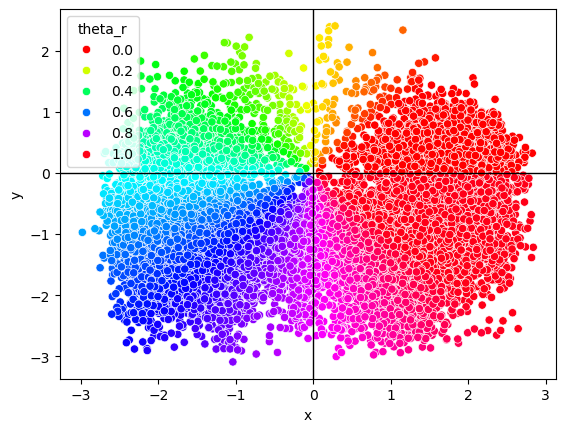

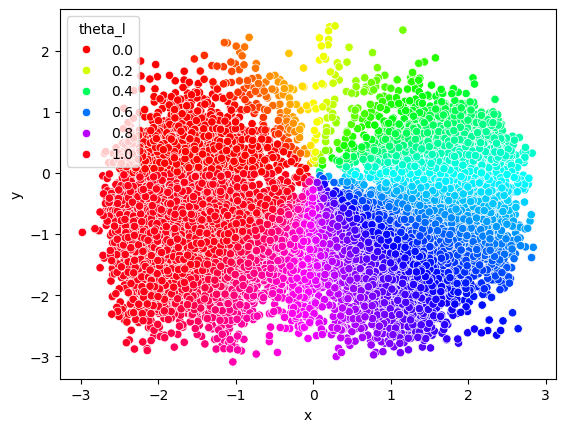

In [ ]:
pars = sub.get_prf_parameters_surface()
pars = pars[pars['r2'] > 0.1]
pars['theta'] = np.arctan2(pars['y'], pars['x'])
pars['theta'] = np.mod(pars['theta'], 2 * np.pi)

pars['theta_r'] = np.clip((pars['theta'] - (.25 * np.pi)) / (1.5*np.pi), 0, 1)
sns.scatterplot(x='x', y='y', hue='theta_r', data=pars, palette='hsv')

plt.axhline(0, color='k', lw=1)
plt.axvline(0, color='k', lw=1)

plt.figure()
pars['theta_l'] = np.mod(pars['theta'] + np.pi, 2 * np.pi)
pars['theta_l'] = -np.clip((pars['theta_l'] - (.25 * np.pi)) / (1.5*np.pi), 0, 1)+1

sns.scatterplot(x='x', y='y', hue='theta_l', data=pars, palette='hsv')

In [51]:
pars['theta_l']

hemi        
L     32        3.573931
      37        3.611823
      42        3.440011
      45        3.172489
      46        2.899952
                  ...   
R     142395    0.864881
      142410    0.671721
      142412    6.219084
      142463    0.619299
      142468    0.586103
Name: theta_l, Length: 15632, dtype: float32

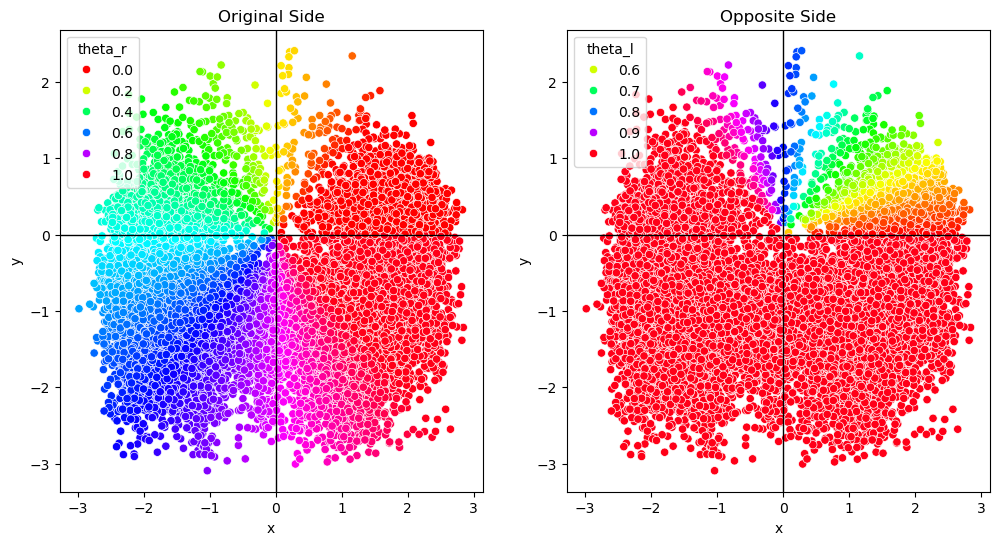

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pars is your DataFrame with PRF parameters
pars = sub.get_prf_parameters_surface()
pars = pars[pars['r2'] > 0.1]
pars['theta'] = np.arctan2(pars['y'], pars['x'])
pars['theta'] = np.mod(pars['theta'], 2 * np.pi)

# Calculate theta_r for the original side
pars['theta_r'] = np.clip((pars['theta'] - (.25 * np.pi)) / (1.5 * np.pi), 0, 1)

# Calculate theta_l for the opposite side
pars['theta_l'] = np.clip((pars['theta'] + np.pi - (.25 * np.pi)) / (1.5 * np.pi), 0, 1)

# Plot for the original side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='x', y='y', hue='theta_r', data=pars, palette='hsv')
plt.axhline(0, color='k', lw=1)
plt.axvline(0, color='k', lw=1)
plt.title('Original Side')

# Plot for the opposite side
plt.subplot(1, 2, 2)
sns.scatterplot(x='x', y='y', hue='theta_l', data=pars, palette='hsv')
plt.axhline(0, color='k', lw=1)
plt.axvline(0, color='k', lw=1)
plt.title('Opposite Side')

plt.show()


In [ ]:
pars = sub.get_prf_parameters_surface()
pars = pars[pars['r2'] > 0.1]

pars['theta'] = np.mod(pars['theta'], 2 * np.pi)
pars['theta_r'] = np.clip((pars['theta'] - (.25 * np.pi)) / (1.5*np.pi), 0, 1)
sns.scatterplot(x='x', y='y', hue='theta_r', data=pars, palette='magma')

In [16]:
pars['theta_shift'] = np.mod(pars['theta'], 2 * np.pi)

theta_l = pars['theta_shift'].loc['L'] - np.pi
theta_r = (pars['theta_shift'].loc['R'] - .25 * np.pi) / (1.5 * np.pi)

<Axes: xlabel='theta_shift', ylabel='Count'>

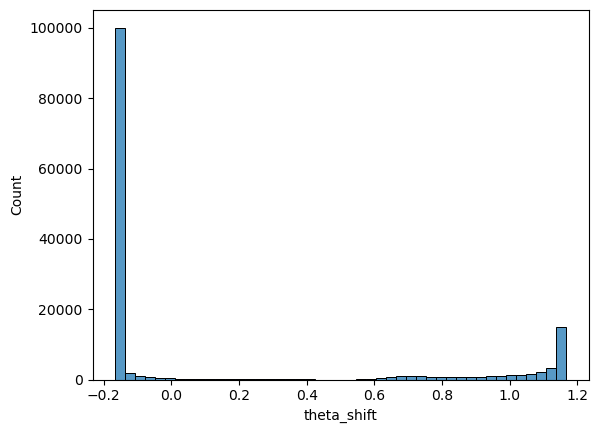

In [18]:
import seaborn as sns
sns.histplot(theta_r[theta_r != 0.0])

In [5]:
sub.get_prf_parameters_volume(return_image=True).shape

(86, 102, 78, 8)

In [14]:
bids_folder = Path('/data/ds-retsupp')
mask = bids_folder / 'derivatives' / 'fmriprep' / 'sub-01' / 'ses-1' / 'func' / 'sub-01_ses-1_task-search_rec-NORDIC_run-1_desc-brain_mask.nii.gz'
mask = '/Users/gdehol/data/ds-retsupp/derivatives/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-search_rec-NORDIC_run-1_space-T1w_desc-brain_mask.nii.gz'
mean_ts = bids_folder / 'derivatives' / 'mean_signal' / 'sub-01'/ 'sub-01_desc-mean_bold.nii.gz'

masker = input_data.NiftiMasker(mask_img=mask, )

data = masker.fit_transform(mean_ts)

In [15]:
data = data.astype(np.float32)

In [16]:
image.load_img(mask).shape

(86, 102, 78)

In [17]:
image.load_img(mean_ts).shape

(86, 102, 78, 258)

In [ ]:


paradigm = sub.get_stimulus(resolution=25).astype(np.float32)
grid_coordinates = sub.get_grid_coordinates(resolution=25)

grid_coordinates = np.stack((grid_coordinates[0].ravel(), grid_coordinates[1].ravel()), axis=1).astype(np.float32)

paradigm = paradigm.reshape((paradigm.shape[0], -1))

In [21]:
from braincoder.models import GaussianPRF2DWithHRF
from braincoder.optimize import ParameterFitter
from braincoder.hrf import SPMHRFModel

In [22]:
import numpy as np
grid_x = np.linspace(-4, 4, 8)
grid_y = np.linspace(-4, 4, 8)
grid_sd = np.linspace(1, 4, 4)
grid_amplitude = [1]
grid_baseline = [0]

In [23]:
hrf_model = SPMHRFModel(tr=1.6)
model = GaussianPRF2DWithHRF(grid_coordinates, paradigm, hrf_model=hrf_model)

In [24]:
fitter = ParameterFitter(model, data, paradigm,)

In [26]:
grid_pars = fitter.fit_grid(grid_x, grid_y, grid_sd, grid_baseline, grid_amplitude, use_correlation_cost=True)

Working with chunk size of 8
Using correlation cost!


  0%|          | 0/32 [00:00<?, ?it/s]

In [27]:
grid_pars = fitter.refine_baseline_and_amplitude(grid_pars)

In [28]:
r2 = fitter.get_rsq(grid_pars)

In [ ]:
r2_mask = image.math_img('r2 > 0.02', r2=masker.inverse_transform(r2))
r2_masker = input_data.NiftiMasker(mask_img=r2_mask)
data_r2 = r2_masker.fit_transform(mean_ts)
grid_pars_r2 = grid_pars[r2 > 0.02]

In [46]:
fitter_r2 = ParameterFitter(model, data_r2, paradigm)
fitter_r2.fit(init_pars=grid_pars_r2, max_n_iterations=100)

*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 25248


Current R2: 0.10356/Best R2: 0.10356: 100%|██████████| 100/100 [01:10<00:00,  1.43it/s]


parameter,x,y,sd,baseline,amplitude
unit,,,,,
0,1.006020,-0.053405,3.245366,-0.307991,3.476554
1,1.873142,-1.875128,2.945634,-0.595734,8.389237
2,-1.425840,-0.728303,0.639687,-0.113473,2.246593
3,-2.171144,2.111878,1.837778,-0.100644,1.839493
4,-2.090648,0.131723,1.761282,-0.375342,4.765392
...,...,...,...,...,...
25243,-1.511439,-1.361107,0.957984,-0.216312,3.461028
25244,-2.051914,-2.011781,2.281618,-0.536522,8.013705
25245,-0.918178,-3.104575,2.473966,-0.640280,10.653279


In [50]:
gd_pars = _46

In [51]:
gd_pars['theta'] = np.arctan2(gd_pars['y'], gd_pars['x'])

In [54]:
r2_masker.inverse_transform(gd_pars['theta']).to_filename('~/Downloads/theta.nii.gz')

In [55]:
gd_pars['ecc'] = np.sqrt(gd_pars['x']**2 + gd_pars['y']**2)
r2_masker.inverse_transform(gd_pars['ecc']).to_filename('~/Downloads/ecc.nii.gz')

In [56]:
fitter_r2.fit(init_pars=gd_pars, max_n_iterations=100)

*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 25248


Current R2: 0.11355/Best R2: 0.11355: 100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


parameter,x,y,sd,baseline,amplitude
unit,,,,,
0,1.389149,-0.151590,3.616240,-0.320085,3.964713
1,1.245455,-1.177999,2.767976,-0.794006,9.107464
2,-1.444628,-0.712242,0.460357,-0.119363,3.123496
3,-1.622975,1.710751,1.355448,-0.107791,1.686879
4,-1.470097,0.188176,1.229632,-0.389714,4.656892
...,...,...,...,...,...
25243,-1.668661,-1.420792,0.864533,-0.230310,4.221362
25244,-1.655259,-1.409321,1.461843,-0.655569,8.840750
25245,-0.691556,-2.186723,1.617028,-0.846058,11.579659


In [57]:
gd_pars = _56

In [59]:
gd_pars['theta'] = np.arctan2(gd_pars['y'], gd_pars['x'])
gd_pars['ecc'] = np.sqrt(gd_pars['x']**2 + gd_pars['y']**2)

r2 = fitter_r2.get_rsq(gd_pars)

r2_masker.inverse_transform(gd_pars['theta']).to_filename('~/Downloads/theta.nii.gz')
r2_masker.inverse_transform(gd_pars['ecc']).to_filename('~/Downloads/ecc.nii.gz')
r2_masker.inverse_transform(r2).to_filename('~/Downloads/r2.nii.gz')

In [ ]:
pars = _43

(0.0, 0.1)

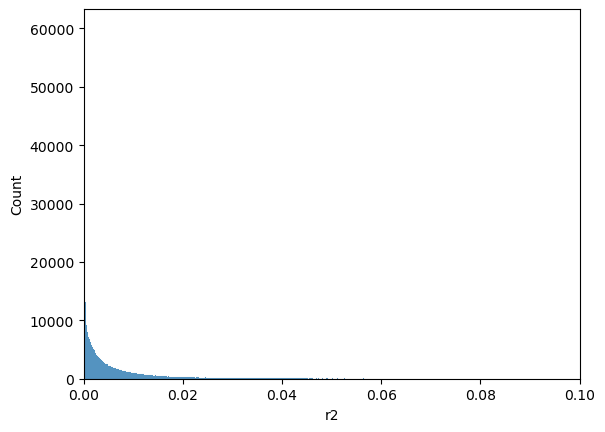

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(r2)
plt.xlim(0, .1)

In [98]:
gd_pars = fitter.fit(max_n_iterations=100, init_pars=grid_pars)

*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
Number of problematic voxels (mask): 18158
Number of voxels remaining (mask): 276538


Current R2: 0.00801/Best R2: 0.00805:   3%|▎         | 3/100 [01:12<39:19, 24.33s/it]


KeyboardInterrupt: 

In [32]:
masker.inverse_transform(r2).to_filename('~/Downloads/r2.nii.gz')

<Axes: xlabel='r2', ylabel='Count'>

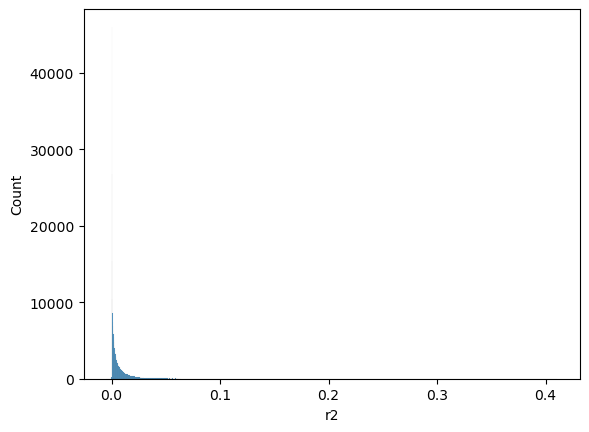

In [97]:
import seaborn as sns
sns.histplot(r2)

In [87]:
(r2 > 0.0).sum()

5

In [ ]:
]

In [ ]:
stimulus.shap

(258, 100, 100)